<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc" style="margin-top: 1em;"><ul class="toc-item"><li><span><a href="#Neural-Networks,-Part-1---MNIST" data-toc-modified-id="Neural-Networks,-Part-1---MNIST-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Neural Networks, Part 1 - MNIST</a></span><ul class="toc-item"><li><span><a href="#Network-class-for-NN" data-toc-modified-id="Network-class-for-NN-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span><code>Network</code> class for NN</a></span></li><li><span><a href="#Sigmoid-Activation-Function-&amp;-Derivative" data-toc-modified-id="Sigmoid-Activation-Function-&amp;-Derivative-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span><code>Sigmoid</code> Activation Function &amp; Derivative</a></span></li><li><span><a href="#feedforward-for-calculating-result" data-toc-modified-id="feedforward-for-calculating-result-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span><code>feedforward</code> for calculating result</a></span></li><li><span><a href="#train_data-for-Dispatching-Mini-Batches-for-Training" data-toc-modified-id="train_data-for-Dispatching-Mini-Batches-for-Training-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span><code>train_data</code> for Dispatching Mini Batches for Training</a></span></li><li><span><a href="#Update-Mini-batches" data-toc-modified-id="Update-Mini-batches-1.5"><span class="toc-item-num">1.5&nbsp;&nbsp;</span>Update Mini-batches</a></span></li><li><span><a href="#Cost-Derivative" data-toc-modified-id="Cost-Derivative-1.6"><span class="toc-item-num">1.6&nbsp;&nbsp;</span>Cost Derivative</a></span></li><li><span><a href="#Calculate-Gradient-Using-Backpropagation" data-toc-modified-id="Calculate-Gradient-Using-Backpropagation-1.7"><span class="toc-item-num">1.7&nbsp;&nbsp;</span>Calculate Gradient Using Backpropagation</a></span></li></ul></li><li><span><a href="#Part-2---Backpropagation-Algorithm" data-toc-modified-id="Part-2---Backpropagation-Algorithm-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Part 2 - Backpropagation Algorithm</a></span><ul class="toc-item"><li><span><a href="#Quadratic-Cost-Function" data-toc-modified-id="Quadratic-Cost-Function-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Quadratic Cost Function</a></span></li><li><span><a href="#Hadamard-(Schur)-Product" data-toc-modified-id="Hadamard-(Schur)-Product-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Hadamard (Schur) Product</a></span></li><li><span><a href="#Error-Function" data-toc-modified-id="Error-Function-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Error Function</a></span></li></ul></li></ul></div>

# Neural Networks, Part 1 - MNIST

In [1]:
import numpy as np

## `Network` class for NN

In [2]:
class Network(object):
    def __init__(self, sizes):
        self.sizes = sizes
        self.biases = [np.random.randn(y,1) for y in sizes[1:]]
        self.weights = [np.random.rand(y,x) for x,y in zip(sizes[1:],sizes[:-1])]

In [3]:
net = Network([2,3,1])

## `Sigmoid` Activation Function & Derivative

In [18]:
def sigmoid(z):
    """Sigmoid function"""
    return 1.0/(1.0 + np.exp(-z))

In [19]:
def sigmoid_prime(z):
    """Returns derivative of sigmoid(z)"""
    return sigmoid(z) * (1 - sigmoid(z))

## `feedforward` for calculating result

In [5]:
def feedforward(self, a):
    """Return the output of the network if "a" is input."""
    for b,w in zip(self.biases, self.weights):
        a = sigmoid(np.dot(w,a) + b)
    return a

## `train_data` for Dispatching Mini Batches for Training

In [12]:
def train_data(self, training_data, epochs, mini_batch_size, eta, test_data=None):
    """Partition the training_data into mini batches and dispatch each batch
    for training the network using the updata_mini_batch method.
    The "training_data" is a list of tuples "(x, y)" representing the
    training inputs and the desired outputs.  The other non-optional
    parameters are self-explanatory.  If "test_data" is provided then
    the network will be evaluated against the test data after each
    epoch, and partial progress printed out.  This is useful for
    tracking progress, but slows things down substantially.
    
    eta: Estimated learning rate 
    
    """
    
    if test_data:
        n_test = len(test_data)
        
    n = len(training_data)
    for j in range(epochs):
        np.random.shuffle(training_data)
        mini_batches = [ training_data[k:k+mini_batch_size] for k in range(0,n,mini_batch_size)]
        
        for mini_batch in mini_batches:
            self.update_mini_batch(mini_batch, eta)
            
        if test_data:
            print("Epoch {0}: {1} / {2}".format(j, self.evaluate(test_data), n_test))
        else:
            print("Epoch {0} complete".format(j))

In [13]:
Network.train_data = train_data

## Update Mini-batches

In [14]:
def update_mini_batch(self, mini_batch, eta):
    """Update the network's weights and biases by applying
        gradient descent using backpropagation to a single mini batch.
        The "mini_batch" is a list of tuples "(x, y)", and "eta"
        is the learning rate."""
    nabla_b = [np.zeros(b.shape) for b in self.biases]
    nabla_w = [np.zeros(w.shape) for w in self.weights]
    for x, y in mini_batch:
        delta_nabla_b, delta_nabla_w = self.backprop(x,y)
        nabla_b = [nb + dnb for nb, dnb in zip(nabla_b, delta_nabla_b)]
        nabla_w = [nw + dnw for nw, dnw in zip(nabla_w, delta_nabla_w)]
    self.weights = [w - (eta/len(mini_batch))*nw for w, nw in zip(self.weights, nabla_w)]
    self.biases = [b - (eta/len(mini_batch))*nb for b, nb in zip(self.biases, nabla_b)]

In [15]:
Network.update_mini_batch = update_mini_batch

## Cost Derivative

In [16]:
def cost_derivative(self, output_activations, y):
    """Returns the vector of partial derivatives \partial C_x/\partial a
    for the output activations."""
    return(output_activations - y)

In [17]:
Network.cost_derivative = cost_derivative

## Calculate Gradient Using Backpropagation

In [ ]:
def backprop(self, x, y):
    """Return a tuple ``(nabla_b, nabla_w)`` representing the
        gradient for the cost function C_x.  ``nabla_b`` and
        ``nabla_w`` are layer-by-layer lists of numpy arrays, similar
        to ``self.biases`` and ``self.weights``."""
    
    nabla_b = [np.zeros(b.shape) for b in self.biases]
    nabla_w = [np.zeros(w.shape) for w in self.weights]
    # feedforward step
    activation = x
    activations = [x] # list to store activations, layer by layer
    zs = [] # list to store z-vectors, layer by layer
    
    for b, w in zip(self.biases, self.weights):
        z = np.dot(w, activation) + b
        zs.append(z)
        activation = sigmoid(z)
        activations.append(activation)
    
    # backward pass
    delta = self.cost_derivative(activations[-1], y) * sigmoid_prime(zs[-1])

# Part 2 - Backpropagation Algorithm

Reference: [Nielsen, Chapter 2](http://neuralnetworksanddeeplearning.com/chap2.html), [Rumelhart, Hinton and Williams, 1986](https://dx.doi.org/10.1038/323533a0)

The basic action of a neural network can be described as follows. The inputs are labeled $a^k_i$, where $k$ denotes the layer and $i$ is the index of the input node. Edge weights are labeled $W^k_{i,j}$, where $k$ denotes that the edge is between the $j {}^\text{th}$ node of the $(k-1) {}^\text{th}$ layer and the $i {}^\text{th}$ node of the $k {}^\text{th}$ layer.

The values of the nodes in the $k {}^\text{th}$ layer are determined by the following relation:
$$ a^k_i = \sigma(W^k_{i,j} a^{k-1}_j + b^k_j) $$
where $b^k_j$ are the bias values assigned to the $j {}^\text{th}$ node in the $k {}^\text{th}$ layer, and $\sigma$ is the sigmoid function given by:
$$ \sigma(z) = \frac{1}{1 + e^{-z}} $$
If we have $m$ hidden layers, then the node values of the various layers are given by the recursive series of relations:
\begin{align}
a^m_i & = \sigma(W^m_{i,j} a^{m-1}_j + b^m_j) \nonumber \\
a^{m-1}_i & = \sigma(W^{m-1}_{i,j} a^{m-2}_j + b^{m-1}_j) \nonumber \\
\vdots \nonumber \\
a^1_i & = \sigma(W^1_{i,j} a^0_j + b^1_j) \nonumber
\end{align}
where $\{a^0_i\},\{a^m_i\}$ denote the set of input and output values, respectively.

The final values $\{a^{m+1}_i\}$ are then given by:
$$ a^{m+1}_i = \frac{e^{a^m_i}}{\sum_i e^{a^m_i}} $$
if we are using the Boltzmann weights or else by:
$$ a^{m+1}_i = \sigma(a^m_i) $$
if using the sigmoid function

In [23]:
x = np.linspace(-10,10,num=100)
y = sigmoid(x)

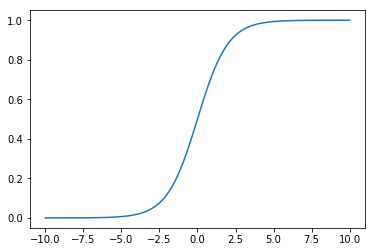

In [24]:
plt.plot(x,y)

## Quadratic Cost Function
The cost function for a single input data set is given by:
$$ C(x) = \frac{1}{2} ||y - a^L||^2 $$
where $y$ is the desired output, $a^L$ is the vector of activations obtained from the network and $x$ are the inputs. The cost function for a batch average is given by:
$$ C = \frac{1}{n} \sum_x C(x) $$
where $n$ is the number of input samples and the sum is over each input set.

## Hadamard (Schur) Product

The Hadamard (or Schur) product of two vectors $a_i, b_i$ is given by a third vector:
$$ c_i = a_i b_i $$
with no implied summation over the repeated index.

## Error Function


$\delta^l_j$ is the "error" in the $j^\text{th}$ neuron of the $l^\text{th}$ layer. If the neuron's weighted input is $z^l_j$, then instead of outputting $\sigma(z^l_j)$, the neuron outputs $\sigma(z^l_j + \Delta z^l_j)$. The corresponding change in the cost function is given by:
$$ \Delta C = \frac{\partial C}{\partial z^l_j} \Delta z^l_j $$
We define the partial derivative of $C$ w.r.t. the weighted input $z^l_j$ are the "error" of that neuron.
$$ \delta^l_j = \frac{\partial C}{\partial z^l_j} $$